## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.tree import plot_tree


# Carregando o conjunto de dados de Boston do novo link
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
boston = pd.read_csv(url)

# Separando as variáveis independentes e a variável dependente
X = boston.drop('medv', axis=1)
y = boston['medv']

In [20]:
# Verificando se há valores nulos e não numéricos:
print(boston.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [23]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [22]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

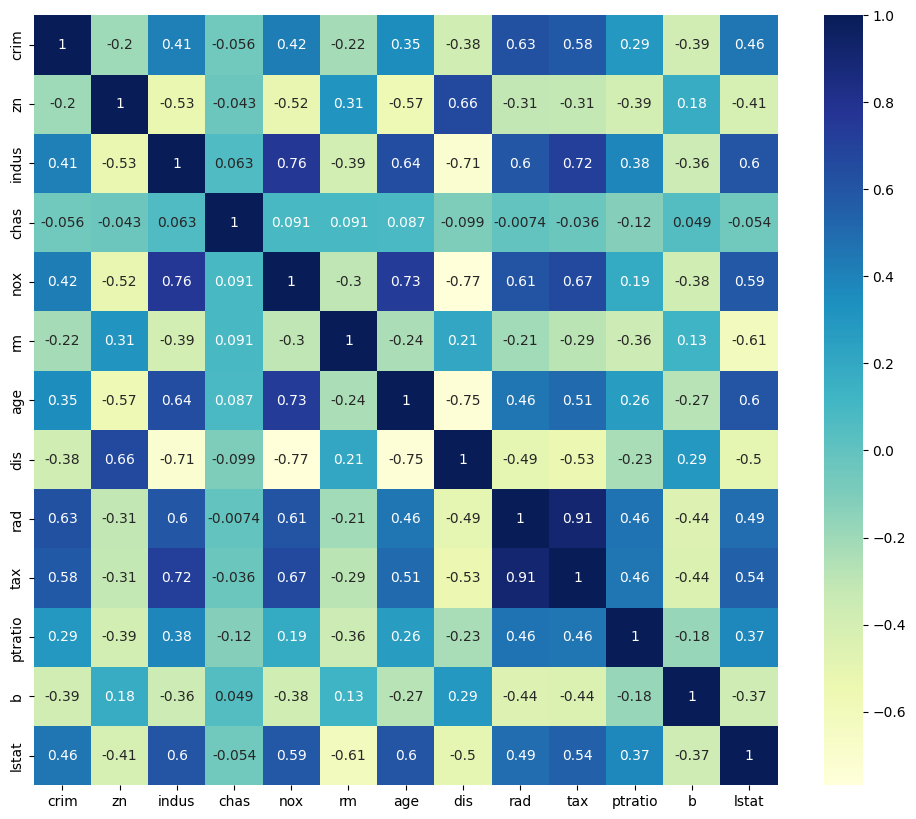

In [25]:
# Calculando a matriz de correlação
corr = X.corr()
# Criando um heatmap com seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

In [26]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo
model = DecisionTreeRegressor(random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [27]:
# Fazendo previsões na base de treinamento
y_pred = model.predict(X_test)

# Calculando o erro médio quadrado (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculando o coeficiente de determinação (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 10.416078431372549
R-squared (R²): 0.8579634380978161


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [28]:
# Calculando o caminho de poda
path = model.cost_complexity_pruning_path(X_train, y_train)

# Os alphas
ccp_alphas = path.ccp_alphas

# As impurezas totais correspondentes
impurities = path.impurities


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [40]:
# Lista para armazenar as árvores
trees = []

# Para cada valor de alfa
for ccp_alpha in ccp_alphas:
    # Criando a árvore com o valor de alfa atual
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)

    # Treinando a árvore
    model.fit(X_train, y_train)

    # Adicionando a árvore à lista
    trees.append(model)


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [41]:
# Lista para armazenar os MSEs
mses = []

# Para cada árvore na lista
for tree in trees:
    # Fazendo previsões no conjunto de teste
    y_pred = tree.predict(X_test)

    # Calculando o MSE
    mse = mean_squared_error(y_test, y_pred)

    # Adicionando o MSE à lista
    mses.append(mse)

print(mses)

[10.416078431372549, 10.416078431372549, 10.416078431372549, 10.416078431372549, 10.416078431372549, 10.416078431372549, 10.416078431372549, 10.416078431372549, 10.416078431372549, 10.416078431372549, 10.416078431372549, 10.416078431372549, 10.416078431372549, 10.416985294117648, 10.416985294117648, 10.416985294117648, 10.416985294117648, 10.413088235294117, 10.413088235294117, 10.413088235294117, 10.416519607843137, 10.416519607843137, 10.416519607843137, 10.416519607843137, 10.415441176470589, 10.415441176470589, 10.415441176470589, 10.415441176470589, 10.415441176470589, 10.415441176470589, 10.414583333333333, 10.414313725490196, 10.414313725490196, 10.414313725490196, 10.414313725490196, 10.417598039215687, 10.417598039215687, 10.417598039215687, 10.422279411764706, 10.421911764705882, 10.421911764705882, 10.421911764705882, 10.421911764705882, 10.421911764705882, 10.423161764705881, 10.420514705882352, 10.420514705882352, 10.420514705882352, 10.420514705882352, 10.420514705882352,

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

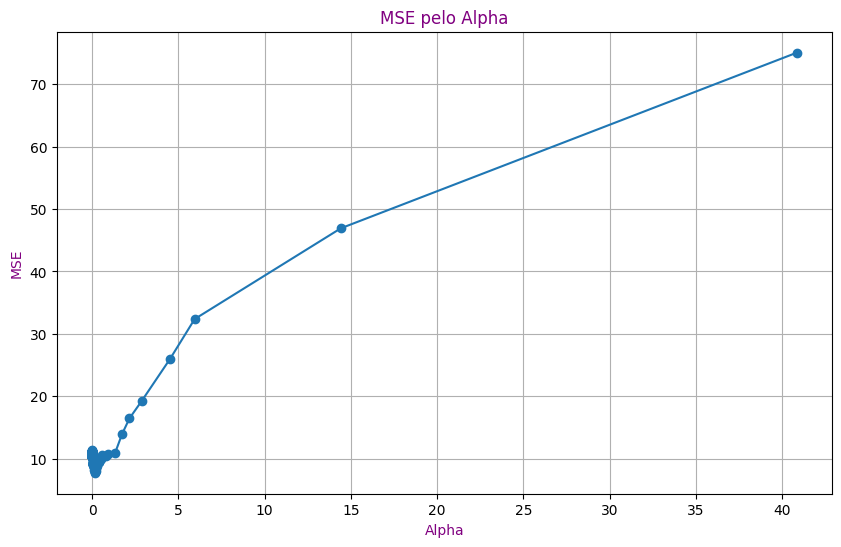

In [42]:
# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mses, marker='o')
plt.xlabel('Alpha', color = 'purple')
plt.ylabel('MSE', color = 'purple')
plt.title('MSE pelo Alpha', color = 'purple')
plt.grid(True)
plt.show()

In [43]:
# Encontrando o índice do menor MSE
idx_min_mse = np.argmin(mses)

# Encontrando o correspondente valor de alfa
alpha_min_mse = ccp_alphas[idx_min_mse]

print(f'O valor de alpha que minimiza o MSE é {alpha_min_mse}')

O valor de alpha que minimiza o MSE é 0.17329304180416916


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [44]:
# Encontrando a árvore que minimiza o MSE
tree_min_mse = trees[idx_min_mse]

# Calculando o R² no conjunto de teste
r2 = tree_min_mse.score(X_test, y_test)

print(f'O R² da árvore que minimiza o MSE é {r2}')


O R² da árvore que minimiza o MSE é 0.8941754942500152


### 7. Visualize esta árvore.

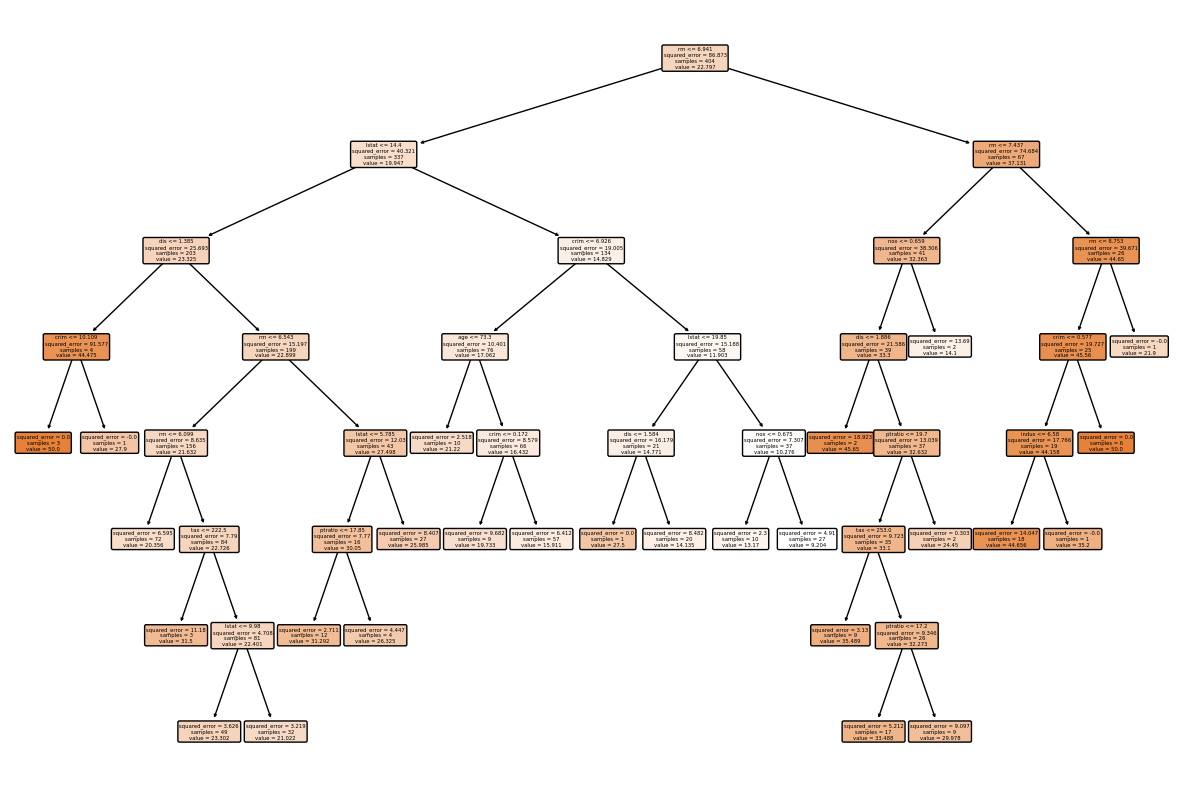

In [34]:
# Criando a figura
plt.figure(figsize=(15, 10))

# Plotando a árvore
plot_tree(tree_min_mse, filled=True, feature_names=X.columns, class_names=True, rounded=True)

# Mostrando o gráfico
plt.show()